Linear Regression
=========

# Problem 3

* [Problem Description](#problem_description)
* [Solution 1: Applying Gradient Descent (Keras)](#gradient_descent_keras)
* [Solution 2: Applying Gradient Descent (Tensorflow)](#gradient_descent_tensorflow)
* [Solution 3: Analytical solution with Least Squares Error minimization](#least-squares-error-minimization)
* [Comparing all 3 solutions](#comparing_solutions)

In this problem we will find the best line that fits a model given by a real dataset. For theory details, please see [Linear Regression Theory](Linear_Regression_Theory.ipynb).

<a id='problem_description'></a>
### Problem Description

In this problem we will use two properties of the **[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)**: 
* width of the sepals
* width of the petals

![](figures/petal_sepal.png)

**The goal is to predict the length of a given petal knowing the the length of its sepal**. You can use as many samples as you want for training. But for this problem we will be using only the **50 samples of the versicolor species**.

In order to start the solution of the problem, let's load the data.

In [80]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Loading the dataset
iris = load_iris()

# Let's see what this dataset contains
print("data:")
print('\tiris.data.shape:', iris.data.shape)
print('\tiris.data.dtype:', iris.data.dtype)
print('\tiris.data.min:,', iris.data.min())
print('\tiris.data.max:', iris.data.max())
print("target:")
print('\tiris.target.shape:' , iris.target.shape)
print('\tiris.target.dtype:', iris.target.dtype)
print('\tiris.target.min:',iris.target.min())
print('\tiris.target.max:',iris.target.max())
print('\tiris.target_names:',iris.target_names)
# Checking the features
print("Features:")
print('\tiris.features_name:',iris.feature_names)
# Visualizing the data
iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['target'] = iris.target
iris_pd.style.set_properties(**{'text-align': 'center'})

data:
	iris.data.shape: (150, 4)
	iris.data.dtype: float64
	iris.data.min:, 0.1
	iris.data.max: 7.9
target:
	iris.target.shape: (150,)
	iris.target.dtype: int32
	iris.target.min: 0
	iris.target.max: 2
	iris.target_names: ['setosa' 'versicolor' 'virginica']
Features:
	iris.features_name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


As can be seen from the table above, there are three types of flowers (setosa, versicolor and virginica). In this exercise we will be using only the **versicolor** species.<p>
The code below extracts only the the sepals and petals lengths of the versicolor. This is the data we will use in this exercise.

In [81]:
# Obtaining only the versicolor species (target = 1)
data = iris.data[iris.target==1]
# Getting the sepal lentgh (cm)
x = data[:,0]
# Getting the petal width (cm)
y = data[:,2]

Let's normalize our data:

In [82]:
# Normalizing our data to be between 0 and 1
x -= x.min()
x /= x.max()
y -= y.min()
y /= y.max()

Now, let's visualize the data:

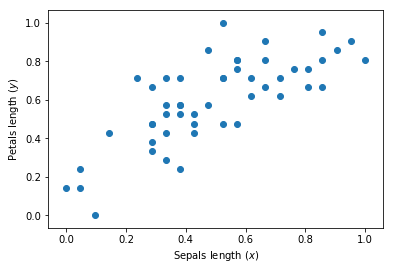

In [83]:
# Plotting the data:
plt.scatter(x,y)
plt.xlabel('Sepals length ($x$)')
plt.ylabel('Petals length ($y$)')
plt.show()

In order to predict the petals length given the sepals length, we are going to use Linear Regression to find the best line that fits this model.<p>
If find the parameters of the best-fitting line ($\beta_0$ and $\beta_1$ in the equation below), we will be able to predict with as less error as possible any petals length ($y$) given its sepals length ($x$). We just need to plug in the line equation the septal length ($x$).<p>
$$\begin{align*} y = \beta_0 + \beta_1 x && \end{align*}$$

<a id='least-squares-error-minimization'></a>
### Solution 1: Least Squares Error minimization

As already demonstrated in [Linear Regression Theory](Linear_Regression_Theory.ipynb), the line that best fits our model is given by:

$$\begin{align*} 
\boxed{y = \beta_0 + \beta_1 x \text{ , where }
            \left\{
                \begin{array}{ll}
                  \beta_0 = \bar{y} - \beta_1\bar{x}\\
                  \beta_1 = \frac{\sum_{i=1}^N \left(x_i - \bar{x}\right)\left(y_i - \bar{y}\right)}{\sum_{i=1}^N \left(x_i - \bar{x}\right)^2}
                \end{array}\right.}
\end{align*} $$

Let's get a little help from NumPy to find $\beta_0$ and $\beta_1$.

In [84]:
import numpy as np

# Finding y and x means
y_mean = np.mean(y)
x_mean = np.mean(x)
# Finding beta_1 and beta_0
beta_1 = np.sum((x-x_mean)*(y-y_mean))/np.sum(np.square(x-x_mean))
beta_0 = y_mean - (beta_1*x_mean)
print("beta_0: %s" % beta_0)
print("beta_1: %s " % beta_1)

beta_0: 0.261341585473
beta_1: 0.686469759176 


Therefore the equation of the line that best fits our septal-petal length model is given by:

The equation of our line is: $$y = 0.2613+ 0.6864 x$$
Let's plot our line:

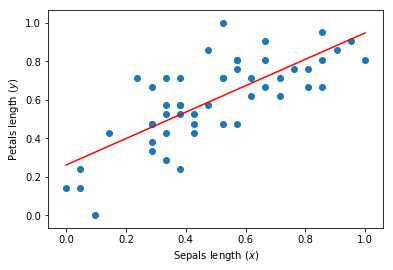

In [85]:
# Finding the extreme y coordinates for our line
y_min = beta_0 + (beta_1*np.min(x))
y_max = beta_0 + (beta_1*np.max(x))

plt.scatter(x, y)
plt.xlabel('Sepals length ($x$)')
plt.ylabel('Petals length ($y$)')
plt.plot([np.min(x),np.max(x)], [y_min,y_max],c='r')
plt.show()

In the last problems we have been using **Mean Squared Error (MSE)** and **Least Squares Error (LSE)** to measure the accuracy of our line.<br>
The code below calculates these errors:

In [86]:
# Mean Squared Error
mse = np.mean(np.square(y - (beta_0 + np.multiply(beta_1,x)))) 
# Least Squares Error
lse = np.sum(np.square(y - (beta_0 + np.multiply(beta_1,x))))
print('MSE: %s' % mse)
print('LSE: %s' % lse)

MSE: 0.0211694241191
LSE: 1.05847120595


<a id='gradient_descent_keras'> </a>
### Solution 2: Applying Gradient Descent (Keras)

Another approach to solve this problem is to see linear regression as a 1-layer neural network with a **linear activation function ($\sigma$)** as shown in the image below:
<img src='figures/lr_with_activation.png'>

In this solution we will be using [Tensorflow](https://www.tensorflow.org) with [Keras](https://keras.io/).

So, let's create our single-neuron model: 

In [87]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
# Cleaning sessions previously started
keras.backend.clear_session()
# Creating our model according to the image above
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation='linear', kernel_initializer='zero'))
# Using Gradient Descent as optimizer
sgd = SGD(lr=0.2)
# Adding the Mean Squared Error loss function and Gradient Descent optimizer to our model
model.compile(optimizer=sgd, loss='mean_squared_error')

Now our model is created, let's train using the model.fit() function:

In [88]:
# As we have only one sample and the gradient is updated after every batch passing through the neuron, 
# let's make our batch longer to avoid having the weights (betas) updated very often.
batch_size = 50
epochs = 1000
# Train our model silently (verbose=0)
result = model.fit(x, y, batch_size=batch_size, epochs=epochs, verbose=0)

Visualizing our error (MSE) for every epoch:

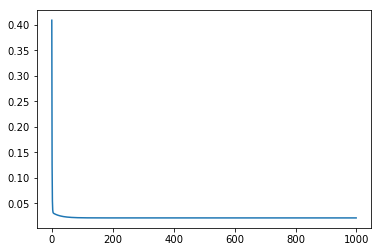

In [89]:
plt.plot(result.history["loss"])
plt.show()

Let's measure our final MSE and LSE, get the weights ($\beta_0$ and $\beta_1$) and plot our line:

beta_0: 0.261342
beta_1: 0.686468 
Mean Squared Eror: 0.0211694241192
Least Squares Eror: 1.05847120596


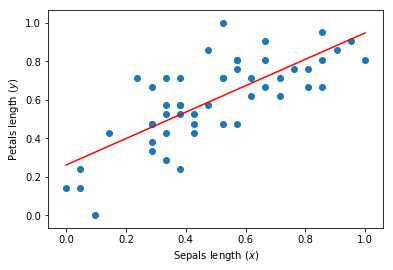

In [90]:
# Get beta_0 and beta_1
[beta_1, beta_0] = model.get_weights()
beta_1 = beta_1[0] #Keras returns our beta_1 as a vector
print("beta_0: %s" % beta_0[0])
print("beta_1: %s " % beta_1[0])
# Measure errors
mse = np.mean(np.square(y - (beta_0 + np.multiply(beta_1,x)))) 
lse = np.sum(np.square(y - (beta_0 + np.multiply(beta_1,x))))
print('Mean Squared Eror: %s' % mse)
print('Least Squares Eror: %s' % lse)
# Plotting
y_min = beta_0 + (beta_1*np.min(x))
y_max = beta_0 + (beta_1*np.max(x))
plt.scatter(x, y)
plt.xlabel('Sepals length ($x$)')
plt.ylabel('Petals length ($y$)')
plt.plot([np.min(x),np.max(x)], [y_min,y_max],c='r')
plt.show()

<a id='gradient_descent_tensorflow'> </a>
### Solution 3: Applying Gradient Descent (Tensorflow)

Keras is a library that can be used on top of Tensorflow. In this approach we will use basically tensorflow. 

First, let's start importing the needed packages:

In [91]:
import tensorflow as tf
# This is a .py file to with useful functions
from utils import show_graph
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import numpy.random as rand
# To enable reproducibility
rand.seed(26051984)

Defining our graph:

In [92]:
# Reseting any graph previously used
tf.reset_default_graph()
# Defining variables that will be updated during training
betas = tf.Variable(np.zeros((2,1), np.float64)) # initializing beta_0 as 0 and beta_1 as 0
Xb = np.hstack([np.ones(shape=(len(x),1)), np.reshape(x, (len(x),1))])
Yb = np.reshape(y,(len(y),1))
# x (input) is constant (it will never be changed)
x_const = tf.constant(Xb)
# y (expected output) is also a constant
y_const = tf.constant(Yb)
# Defining our output
output = tf.matmul(x_const,betas)
error = output-y_const
mse = tf.reduce_mean(tf.square(error))
lse = tf.reduce_sum(tf.square(error))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(mse)

Executing our graph and plotting our results:

In [93]:
num_epochs = 2000
learning_rate = 0.2

# Creating our session
with tf.Session() as session:
    # Initializing our variables
    session.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        # Run our graph
        out = session.run(optimizer)
        best_betas = betas.eval()
        # Calculate error every 1000 epochs
        if epoch % 1000 == 0:
            print("Epoch %s MSE = %s LSE = %s" %(epoch, mse.eval(), lse.eval()))
# Getting beta 0 and beta 1
beta_0 = best_betas[0][0]
beta_1 = best_betas[1][0]
# Printing results
print("beta_0: %s" % beta_0)
print("beta_1: %s " % beta_1)

Epoch 0 MSE = 0.243482020235 LSE = 12.1741010118
Epoch 1000 MSE = 0.0211694241841 LSE = 1.05847120921
beta_0: 0.261341586793
beta_1: 0.686469756627 


<a id='comparing_solutions'></a>
### Comparing Solutions

The table below shows a comparisson among the 3 approaches used to solve this problem.

In [94]:
import pandas as pd
# The annotated results
analytic_solution = {'Mean Squared Error': 0.0211694241191, 'Least Squared Error': 1.05847120595, 'beta_0': 0.261341585473, 'beta_1': 0.686469759176 }
keras_1k = {'Mean Squared Error': 0.0211694241192, 'Least Squared Error': 1.05847120596, 'beta_0': 0.261342, 'beta_1': 0.686468 }
tensorflow_2k = {'Mean Squared Error': 0.0211694241841, 'Least Squared Error': 1.05847120921, 'beta_0':0.261341586793, 'beta_1': 0.686469756627 }
# Columns
index=['Analytic Solution (reference)', 'Keras (1000 epochs)', 'Tensorflow (2000 epochs)']
# Showing with panda
data = [analytic_solution, keras_1k, tensorflow_2k]
df = pd.DataFrame(data, index)
df.style.set_properties(**{'text-align': 'center'})

,Least Squared Error,Mean Squared Error,beta_0,beta_1
Analytic Solution (reference),1.05847,0.0211694,0.261342,0.68647
Keras (1000 epochs),1.05847,0.0211694,0.261342,0.686468
Tensorflow (2000 epochs),1.05847,0.0211694,0.261342,0.68647


Notice that as our training dataset has only few samples and our learning rate is low, we don't need much training to reach the lowest error rates. The analytic solution gives us the lowest possible errors and can be achieved by training our neuron with  few thousand epochs.